<a href="https://colab.research.google.com/github/wbfrench1/sklearn/blob/main/src/sklearn_ch_4_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature

## Linear Regression Model

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 +\dotsb+ \theta_nx_n $
<br><br>

$\hat{y}$ is the predicted value

n is the number of features

x is the $i^{th}$ feature value

$\theta_j$ is the $j^{th}$  model parameter, including the bias term $\theta_0$ and the feature weights $\theta_1$, $\theta_2$, $\dotsc$, $\theta_n$

## Linear Regression Model \(Vectorized Form)

$\mathbf{\hat{y}} = h_\mathbf{θ}(\mathbf{x}) =\mathbf{θ} \cdot \mathbf{x}$

$h_\mathbf{θ}$ is the hypothesis function

$\mathbf{θ}$ is the model's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$

$\mathbf{x}$ is the instance's feature vector, containing $x_0$ to $x_n$ with $x_0$ always equal to 1


## Performance Metric- MSE cost function for a linear regression model

$\displaystyle MSE(\mathbf{X}, h_\mathbf{\theta})$ = $\frac{1}{m}\displaystyle\sum_{i=1}^{m}(\theta^\intercal\mathbf{x}^{(i)}-y^{(i)})^2$

In [ ]:
np.random.seed(42)  # to make the example reproducible
m = 100 # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.rand(m, 1) # column vector

In [ ]:
df = pd.DataFrame(np.concatenate((X,y),axis=1),columns=['X', 'y'])

Text(0.5, 1.0, 'X vs y')

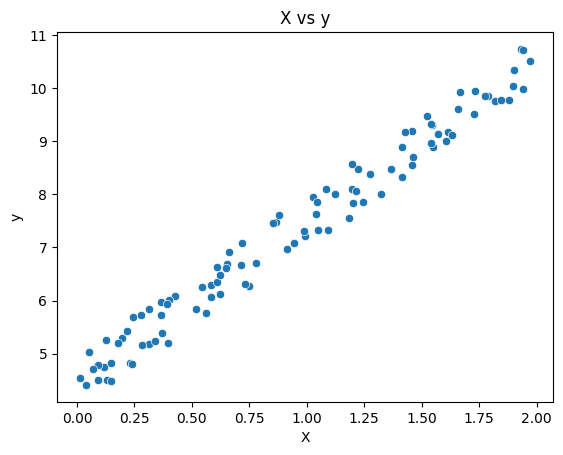

In [ ]:
g = sns.scatterplot(df, x='X', y='y',)
g.set_title('X vs y') 

## Batch Gradient Descent

### Partial dervices of the cost function

$\frac{\partial{}}{\partial \theta_j} \displaystyle{MSE}(\displaystyle{\mathbf{\theta}}) = \frac{2}{m}\displaystyle\sum_{i=1}^{m}(\theta^\intercal\mathbf{x}^{(i)}-y^{(i)})x^{(i)}_j$

### Gradient vector of the cost function

$\nabla_\theta \displaystyle{MSE(\theta)} = 
 \begin{pmatrix}
  \frac{\partial{}}{\partial \theta_0}\displaystyle{MSE}(\displaystyle{\mathbf{\theta}}) \\
  \frac{\partial{}}{\partial \theta_1} \displaystyle{MSE}(\displaystyle{\mathbf{\theta}})\\
  \vdots \\
  \frac{\partial{}}{\partial \theta_n} \displaystyle{MSE}(\displaystyle{\mathbf{\theta}})\\
 \end{pmatrix} = \frac{2}{m}\displaystyle{\mathbf{X}}^\intercal(\displaystyle{\mathbf{X\theta}} - \mathbf{y})$

### Gradient descent step
$\mathbf{\theta}^{(next \, step)}  = \mathbf{\theta} -  \eta\nabla_\theta\displaystyle{MSE}(\displaystyle{\mathbf{\theta}})$


In [ ]:
X_b = add_dummy_feature(X) # add X0 = 1 to each instance

eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # randomly initialized model parameters

In [ ]:
# updates the gradient values
for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [ ]:
# input x's -- each one is a complete set of independent variables
print(X_b.shape)
X_b[:3]

(100, 2)


array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788]])

In [ ]:
# predictions
print((X_b @ theta).shape)
(X_b @ theta)[:3]

(100, 1)


array([[ 6.74827942],
       [10.18600448],
       [ 8.88101635]])

In [ ]:
# cost function (predicted value - actual value)
(X_b @ theta - y)[:3]

array([[ 0.46960952],
       [-0.15469177],
       [ 0.17469672]])

In [ ]:
theta

array([[4.51359766],
       [2.98323418]])

## Illustration of various learning rates

In [ ]:
# start off with one learning rate and do the below
# create a list of learning rates
# run a complete set of epochs for each learning rate
## for each epoch save the resulting regression equation
# for each learning rate, graph the set of regression equations
## each equation should have a progressively darker line

In [ ]:
def update_regression_coefs (a_X_b: np.ndarray, 
                          a_y: np.ndarray,
                          a_theta: np.ndarray,
                          f_eta: float,
                          ) -> np.ndarray:

    ''' a_X= an np.ndarray containing independent variables
        a_y= an np.ndarray containing dependent variable
        a_theta = an np.ndarray containing the current regression coefficients
        f_eta = a float containing the learning rate for the algorithm

        returns: np.ndarray containing the updated regression line cofficients 
    '''

    # updates the gradient values
    a_gradients = 2/m * a_X_b.T @ (a_X_b @ theta - a_y)
    a_theta = theta - f_eta * a_gradients

    return a_theta

In [ ]:
# test new function
np.random.seed(42)
theta = np.random.randn(2,1)  # randomly initialized model parameters

# 
update_regression_coefs(a_X_b= X_b,
                     a_y= y,
                     a_theta= theta,
                     f_eta = 0.1)

array([[1.88715824],
       [1.38804772]])

In [ ]:
# test looping

def train_regression_model (a_X_b: np.ndarray, 
                            a_y: np.ndarray,
                            f_eta: float,
                            int_epochs: int,
                            ) -> list:

    ''' a_X= an np.ndarray containing independent variables
        a_y= an np.ndarray containing dependent variable
        f_eta = a float containing the learning rate for the algorithm
        int_epochs= a integer representing number of times 

        returns: np.ndarray containing the updated regression line cofficients 
    '''

l_thetas= []
int_epochs = 3

np.random.seed(42)
theta = np.random.randn(2,1)  # randomly initialized model parameters
print(theta)

for epoch in range(0, int_epochs):
    theta = update_regression_coefs(a_X_b= X_b,
                                    a_y= y,
                                    a_theta= theta,
                                    f_eta = 0.1
                                    )
    l_thetas.append(theta)
    


[[ 0.49671415]
 [-0.1382643 ]]
[array([[1.88715824],
       [1.38804772]]), array([[2.71245651],
       [2.27593617]]), array([[3.2057079 ],
       [2.78934668]])]
